In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sbn
import numpy as np
import os
import warnings
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [4]:
df = pd.read_excel('ded_df.xlsx', dtype = {'sleep_quality': str, 'stress_level': str}).iloc[:,1:]

In [19]:
# Drop first category of categorical variables
df_dummify = pd.get_dummies(df, drop_first = True)

# select columns for baseline model 
df_bl = df_dummify.loc[:,['discomfort_eye-strain_Y', 'redness_in_eye_Y', 'irritation_in_eye_Y', 'dry_eye_disease_Y']]

# Split df_dummify into X and y
X, y = df_bl.iloc[:,:-1], df_bl.loc[:,'dry_eye_disease_Y']

# Split X and y into train set and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 30)

In [23]:
# Fit decision tree on train set
DT = DecisionTreeClassifier(random_state = 2102).fit(X_train, y_train)
DT

DecisionTreeClassifier(random_state=2102)

In [27]:
# predict test set samples 
yhat = DT.predict(X_test)

In [53]:
DT.feature_importances_

array([0.1686275 , 0.32325329, 0.50811921])

In [37]:
cv_dt = cross_validate(DT, X_test, y_test, cv = 3,
            scoring = ('accuracy', 'recall', 'f1'))
cv_dt

{'fit_time': array([0.00484133, 0.00444698, 0.00427532]),
 'score_time': array([0.01251507, 0.01092005, 0.01054335]),
 'test_accuracy': array([0.70614693, 0.68942236, 0.71717929]),
 'test_recall': array([0.92980437, 0.9424626 , 0.94585253]),
 'test_f1': array([0.80478088, 0.79824561, 0.8132739 ])}

In [40]:
accuracy_score = np.mean(cv_dt['test_accuracy'])
recall_score = np.mean(cv_dt['test_recall'])
f1_score = np.mean(cv_dt['test_f1'])
print("accuracy is {}".format(accuracy_score))
print("recall is {}".format(recall_score))
print("f1 score is {}".format(f1_score))

accuracy is 0.7042495256497782
recall is 0.9393731693650027
f1 score is 0.8054334628328012


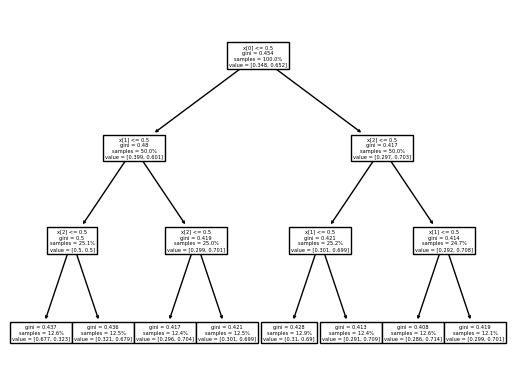

In [67]:
tree.plot_tree(DT, proportion=True)
#plt.show()
plt.savefig('CM_dt_viz.png')

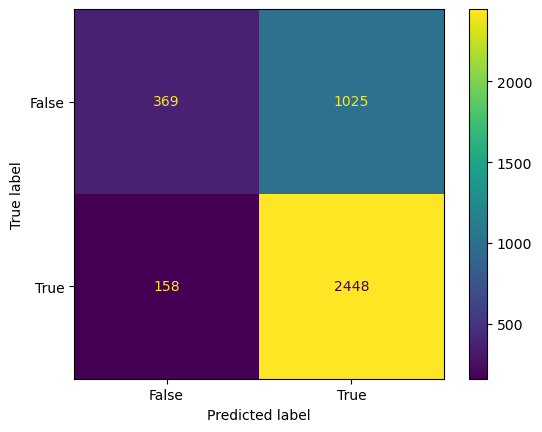

In [50]:
cm = confusion_matrix(y_test, yhat, labels=DT.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=DT.classes_
                              )
disp.plot()
#plt.show()
plt.savefig('CM_dt_model.png')

# Report

In [10]:
import time 
#importing the time library 

In [11]:
start = time.time()
#the current time

# Drop first category of categorical variables
df_dummify = pd.get_dummies(df, drop_first = True)

# select columns for baseline model 
df_bl = df_dummify.loc[:,['discomfort_eye-strain_Y', 'redness_in_eye_Y', 'irritation_in_eye_Y', 'dry_eye_disease_Y']]

# Split df_dummify into X and y
X, y = df_bl.iloc[:,:-1], df_bl.loc[:,'dry_eye_disease_Y']

# Split X and y into train set and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 30)

# Fit decision tree on train set    
DT = DecisionTreeClassifier(random_state = 2102).fit(X_train, y_train)

# predict test set samples 
yhat = DT.predict(X_test)

cv_dt = cross_validate(DT, X_test, y_test, cv = 3,
            scoring = ('accuracy', 'recall', 'f1'))
            
accuracy_score = np.mean(cv_dt['test_accuracy'])
recall_score = np.mean(cv_dt['test_recall'])
f1_score = np.mean(cv_dt['test_f1'])

end = time.time()

In [12]:
print("THE PROCESS TOOK :",end - start)

THE PROCESS TOOK : 0.128068208694458
